# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
import numpy as np
import pandas as pd  

from keras.utils import np_utils

import matplotlib.pyplot as plt
#from keras.utils import plot_model
#from IPython.display import Image
    
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist

( x_train_image, y_train_label ), ( x_test_image, y_test_label ) = mnist.load_data( )

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
# 訓練集及測試集資料的維度

print( 'Shape of Train : ',  x_train_image.shape )
print( 'Shape of Train Label : ',  y_train_label.shape )  
print( 'Shape of Test : ',  x_test_image.shape )  
print( 'Shape of Test Label : ',  y_test_label.shape )

Shape of Train :  (60000, 28, 28)
Shape of Train Label :  (60000,)
Shape of Test :  (10000, 28, 28)
Shape of Test Label :  (10000,)


In [4]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape( 60000, 784 ).astype( 'float32' )  # 784 = 28 * 28
x_Test =x_test_image.reshape( 10000, 784 ).astype( 'float32' )

print( 'Shape of Train : ',  x_Train.shape )
print( 'Shape of Train : ',  x_Test.shape )

Shape of Train :  (60000, 784)
Shape of Train :  (10000, 784)


In [0]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
# OneHot Encoding : 把LABEL 轉成 NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical( y_train_label ) 
y_Test_OneHot = np_utils.to_categorical( y_test_label )

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#建立模型
model = Sequential( )

# 輸入層
model.add( Dense( units = 256,                        # 神經元數量
                         #input_dim = 784,  
                           input_shape = ( 784, ), 
                           kernel_initializer = 'normal',   # 初始化權重的方法
                           activation = 'relu', 
                           name = 'Input_layer'
                           ) )

# 隱藏層
model.add( Dense( 128, kernel_initializer = 'normal', activation = 'relu', name = 'Hidden_1' ) )    # 建立有 128 個神經元的隱藏層
model.add( Dense( 64, kernel_initializer = 'normal', activation = 'tanh', name = 'Hidden_2' ) )     # 建立有 64 個神經元的隱藏層

# 輸出層
model.add( Dense( units = 10,                           # 神經元數量
                           kernel_initializer = 'normal',    # 初始化權重的方法
                           activation = 'softmax', 
                           name = 'Output_Layer'
                           ) )


W0707 09:29:48.067828 139954764208000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 09:29:48.105696 139954764208000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 09:29:48.117280 139954764208000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [9]:
print( model.summary( ) )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 256)               200960    
_________________________________________________________________
Hidden_1 (Dense)             (None, 128)               32896     
_________________________________________________________________
Hidden_2 (Dense)             (None, 64)                8256      
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# 模型網絡的流程圖  

#plot_model( model, to_file = 'Model.png' )
#Image( 'Model.png' )

# 訓練模型

In [10]:
model.compile( loss = 'categorical_crossentropy',  # 損失函數(Loss Function)
               optimizer = 'adam',                 # 最佳化的演算法
               metrics = [ 'accuracy' ]            # 模型成效的評量指標
               )

W0707 09:30:19.011317 139954764208000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 09:30:19.045035 139954764208000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
train_history = model.fit( x = x_Train_normalize,
                           y = y_Train_OneHot, 
                           validation_split = 0.2,   # 驗證集佔訓練集的比例
                           epochs = 10,              # 模擬次數
                           batch_size = 20,          # 每批次的資料筆數
                           verbose = 1               # 顯示模型訓練進度 
                           )

W0707 09:30:43.176074 139954764208000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0707 09:30:43.229553 139954764208000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 262us/step - loss: 0.2474 - acc: 0.9284 - val_loss: 0.1089 - val_acc: 0.9672
Epoch 2/10
48000/48000 [==============================] - 9s 183us/step - loss: 0.0974 - acc: 0.9705 - val_loss: 0.1085 - val_acc: 0.9702
Epoch 3/10
48000/48000 [==============================] - 9s 180us/step - loss: 0.0705 - acc: 0.9784 - val_loss: 0.0855 - val_acc: 0.9740
Epoch 4/10
48000/48000 [==============================] - 9s 182us/step - loss: 0.0527 - acc: 0.9837 - val_loss: 0.1054 - val_acc: 0.9711
Epoch 5/10
48000/48000 [==============================] - 9s 181us/step - loss: 0.0405 - acc: 0.9873 - val_loss: 0.0979 - val_acc: 0.9737
Epoch 6/10
48000/48000 [==============================] - 9s 180us/step - loss: 0.0360 - acc: 0.9885 - val_loss: 0.0914 - val_acc: 0.9767
Epoch 7/10
48000/48000 [==============================] - 9s 181us/step - loss: 0.0301 - acc: 0.9905 - val_loss: 0.1013 -

# 以圖形顯示訓練過程

In [0]:
def show_train_history( train_history ) : 
        fig = plt.gcf( )
        fig.set_size_inches( 12, 5 )
        
        plt.subplot( 121 )
        plt.plot( train_history.history[ 'acc' ] )
        plt.plot( train_history.history[ 'val_acc' ] )
        plt.title( 'Train History' )
        plt.xlabel( 'Epoch' )
        plt.ylabel( 'Accuracy' )
        plt.legend( [ 'train', 'validation' ], loc = 'upper left' )
        
        plt.subplot( 122 )
        plt.plot( train_history.history[ 'loss' ] )
        plt.plot( train_history.history[ 'val_loss' ] )
        plt.title( 'Train History' )
        plt.xlabel( 'Epoch' )
        plt.ylabel( 'Loss' )
        plt.legend( [ 'train', 'validation' ], loc = 'upper left' )
        
        plt.show( )

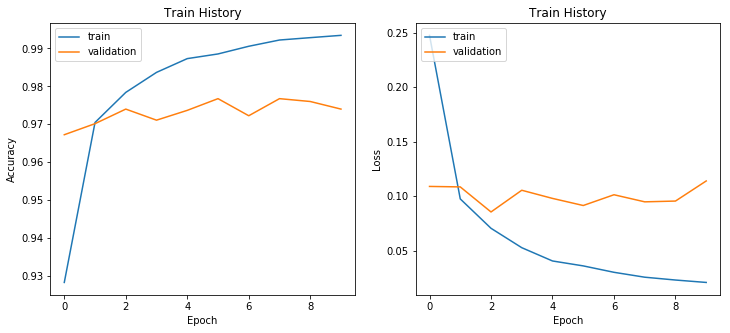

In [14]:
show_train_history( train_history )

# 評估模型準確率

In [15]:
scores = model.evaluate( x_Test_normalize, y_Test_OneHot )

print( 'accuracy = ', scores[1] )

10000/10000 [==============================] - 0s 38us/step
accuracy =  0.9716


# 測試集進行預測

In [0]:
prediction = model.predict_classes( x_Test_normalize ) 

In [17]:
# 混淆矩陣

pd.crosstab( y_test_label, prediction, rownames = [ 'label' ], colnames = [ 'predict' ] )

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,0,0,0,0,4,0,3,1
1,0,1094,0,3,0,3,3,0,32,0
2,5,5,976,25,1,0,2,2,16,0
3,0,0,0,992,0,4,0,2,5,7
4,3,0,2,0,958,1,6,3,4,5
5,7,0,0,8,1,867,2,0,6,1
6,1,1,1,1,1,8,942,0,3,0
7,3,0,10,7,1,0,0,992,6,9
8,1,0,1,3,1,3,0,1,961,3
